In [ ]:
"""
Zadanie 2.

Przygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).

Analizę wykonaj w dwóch wersjach:

1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.
2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:

    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugiej strony),
    - termów wspólnych dla dwóch stron (termy pojawiające się w wypowiedziach jednej i drugiej strony jednocześnie).
"""

In [45]:
import twint
import nest_asyncio
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('SnowballStemmer')

nest_asyncio.apply()

In [33]:
# c = twint.Config()
# c.Search = '#verstappen'
# c.Limit = 5
# twint.run.Search(c)

In [34]:
#Funkcja pobierająca dane za pomocą biblioteki twint
def get_data(query, limit):
    c = twint.Config()
    c.Search = query
    c.Lang = 'en'
    c.Limit = limit
    c.Pandas = True
    twint.run.Search(c)
    tweets = twint.storage.panda.Tweets_df
    return tweets

In [35]:
#Funkcja oczyszczająca tweety
def cleaned_tweets(text):
    # normalizacja tekstu
    temp = re.sub("\s{2,}", " ", text)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("rt", "", temp) 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = temp.strip()
    
    # usuwanie duplikatów ze zbioru
    words_set = set(temp.split())
    words_list = list(words_set)
    
    # tokenizacja
    tokens = nltk.word_tokenize(" ".join(words_list))
    
    # tworzenie listy stop słów
    stop_words = set(stopwords.words('english'))
    
    # stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens if not token in stop_words]
    
    return stemmed_tokens

In [31]:
# Definicja funkcji generującej chmurę słów
def generate_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
    wordcloud.generate(data)
    plt.figure(figsize = (8, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [ ]:
# Pobranie danych z Twittera, 50 tweetów
#data1 = get_data("#climatechange -filter:retweets", 50)
#data2 = get_data("#globalwarming -filter:retweets", 50)

In [46]:
# Oczyszczenie tweetów
#clean_data1 = [cleaned_tweets(tweet) for tweet in data1['tweet']]
#clean_data2 = [cleaned_tweets(tweet) for tweet in data2['tweet']]

In [47]:
# Połączenie tweetów w jedną listę
#all_data = clean_data1 + clean_data2

In [50]:
#Pobranie danych dla obu grup tweetów
group1_tweets = get_data('climate change', 50)
group2_tweets = get_data('global warming', 50)

1640108206100717570 2023-03-26 23:47:22 +0200 <Alex00733554> @UnfilteredOnFox @dbongino @ClimateDepot Biden is now a scientist to he knows climate change is coming. Maybe he knows when God is coming and save him from the hell he put it in this country
1640108163817979905 2023-03-26 23:47:12 +0200 <urbanfishDr> @liedenier @briefermadness @RyanWaltersSupt @oksde Is that the only use of this email? I would certainly report if there are inaccurate history lessons that describe mass scale human trafficing as "black migration" or imply that many slaves were happy with their lot. Or any that refer to climate change or evolution as "theories".
1640108151994236928 2023-03-26 23:47:09 +0200 <buffaloon> A winter without sledding. A reminder of what climate change is taking from us  https://t.co/wW886mrVgu
1640108131362672642 2023-03-26 23:47:04 +0200 <tobyzapf> The general public is finally starting to catch on to the climate change grift
1640108124353835011 2023-03-26 23:47:03 +0200 <jryerson1> 

In [51]:
#Oczyszczenie tweetów
group1_cleaned = [cleaned_tweets(tweet) for tweet in group1_tweets['tweet']]
group2_cleaned = [cleaned_tweets(tweet) for tweet in group2_tweets['tweet']]

group1_words = set([word for tweet in group1_cleaned for word in tweet])
group2_words = set([word for tweet in group2_cleaned for word in tweet])

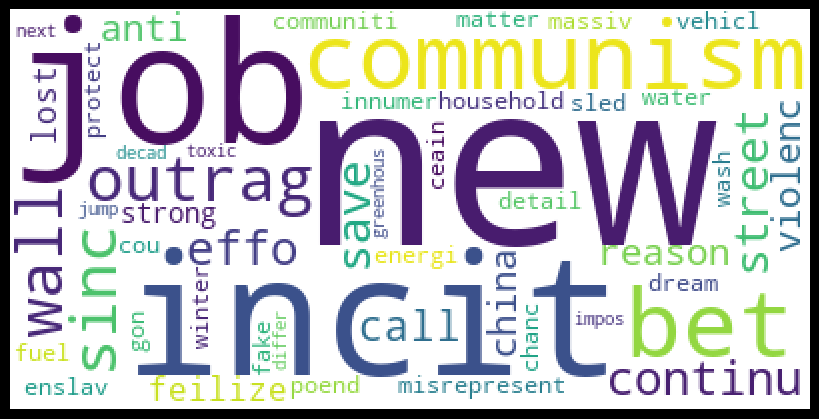

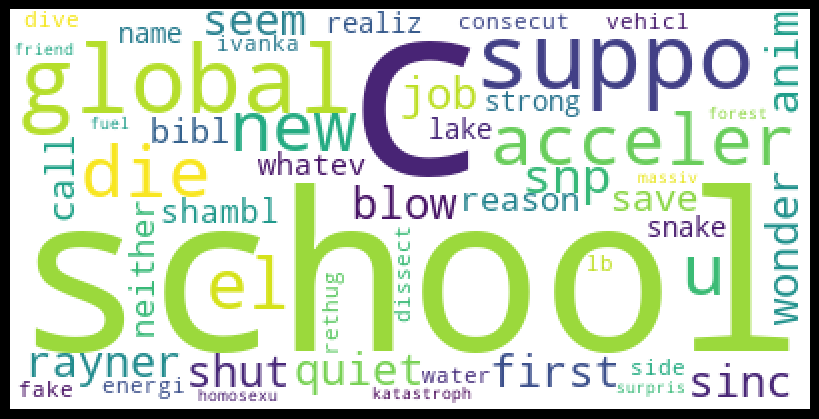

In [52]:
#Wygenerowanie chmury słów
generate_wordcloud(' '.join(group1_words))
generate_wordcloud(' '.join(group2_words))

In [54]:
#Przygotowanie chmury słów na podstawie bag-of-words dla dwóch tekstów traktowanych jako jeden
group1_articles = get_data('climate change', 5)
group2_articles = get_data('global warming', 5)

corpus = group1_articles + group2_articles

1640124690336464896 2023-03-27 00:52:52 +0200 <UncleChopperRIP> @kerry98198 @staceylmayo @JackLabarge7 @GeraldKutney So still no actual current data supplied to dispute AGW &amp; the Climate Change Consensus.  Just out of date, cherry picked &amp; debunked BS together with opinions, inane questions, innuendos &amp; insults.  Until you offer real evidence you embarrass yourself.  https://t.co/uxAsndc1GU
1640124647726366720 2023-03-27 00:52:42 +0200 <CMSnMoffical> @MikeHudema climate change isnt real
1640124643037118466 2023-03-27 00:52:41 +0200 <Tzadik_Ha_Dor> As a leader in the fight against climate change, @POTUS, you have a responsibility to make choices that align with our climate goals. Approving the Willow Project contradicts this responsibility and harms our planet. Please prioritize reducing emissions and protecting our future.
1640124630236028936 2023-03-27 00:52:38 +0200 <strikezcoal1> @verycentrist @WorldFullofJunk @RachunZero @TonyClimate @elonmusk There are standardized tes

In [55]:
#Oczyszczenie tweetów z całego korpusu
corpus_cleaned = [cleaned_tweets(article) for article in corpus]

group1_words = set([word for article in corpus_cleaned[:5] for word in article])
group2_words = set([word for article in corpus_cleaned[5:] for word in article])

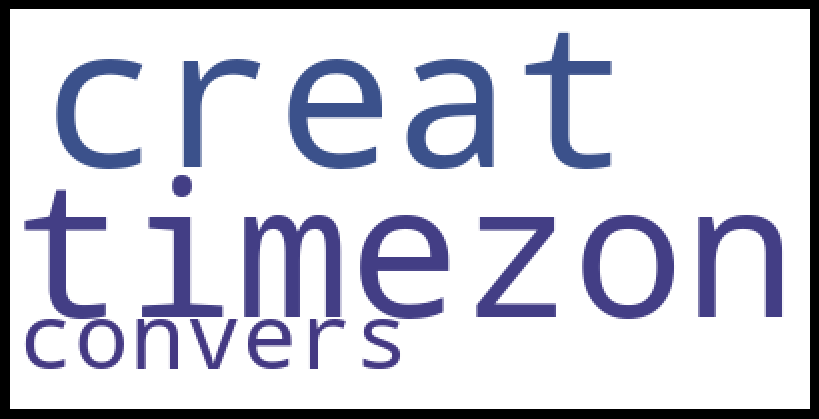

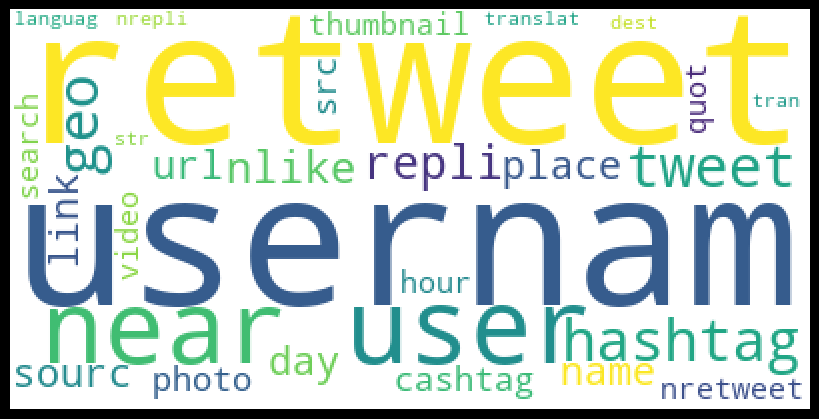

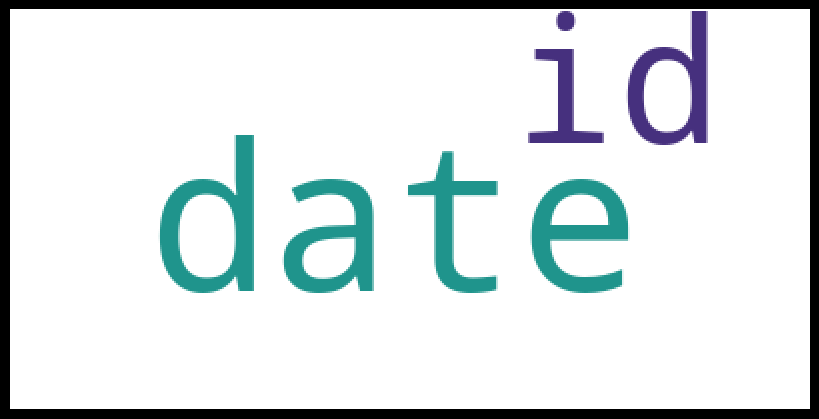

In [56]:
unique_group1_words = group1_words - group2_words
unique_group2_words = group2_words - group1_words
common_words = group1_words.intersection(group2_words)

generate_wordcloud(' '.join(unique_group1_words))
generate_wordcloud(' '.join(unique_group2_words))
generate_wordcloud(' '.join(common_words))